In [81]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
from trng import LightRandom

In [ ]:
# lrng = LightRandom()

# n_samples = 1000
# data_rand = lrng.rand((n_samples))
# DATA = pd.DataFrame(data_rand, columns=["rand"])
# DATA.to_csv("Collected_1000_For_TSP.csv", index=False)
# DATA

In [83]:
num_rand = pd.read_csv("Collected_1000_For_TSP.csv")
num_rand = num_rand.to_numpy().reshape(1000)

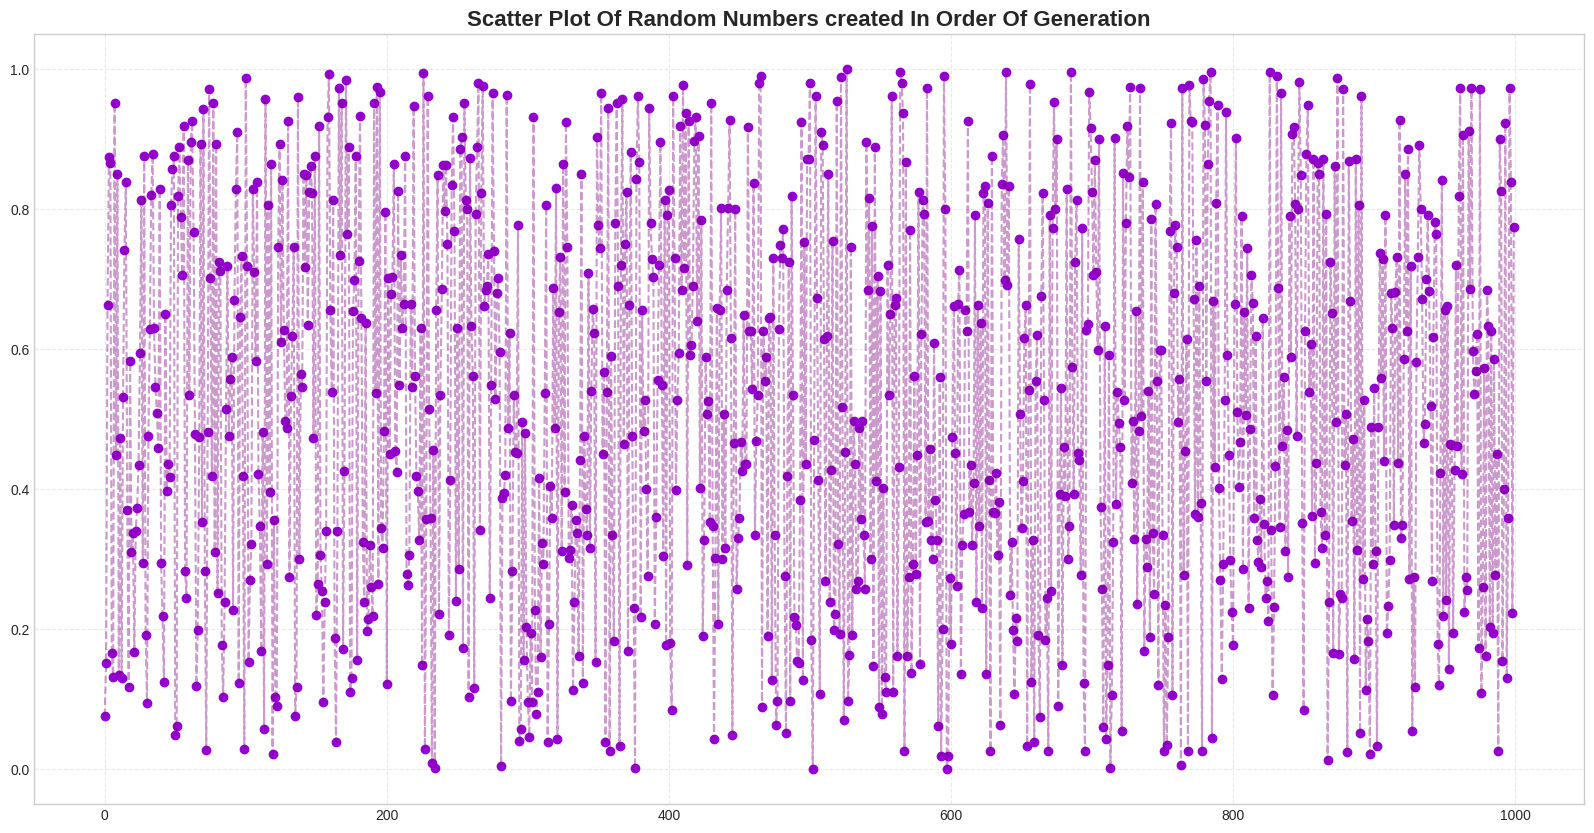

In [84]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(num_rand, color="purple", linestyle="--", alpha=0.4)
plt.scatter(range(len(num_rand)), num_rand, label="Scatter Plot Of Random Numbers", color="darkviolet")
plt.title("Scatter Plot Of Random Numbers created In Order Of Generation", weight="bold", fontsize=16)
plt.grid(linestyle="--", alpha=0.4)
plt.show()

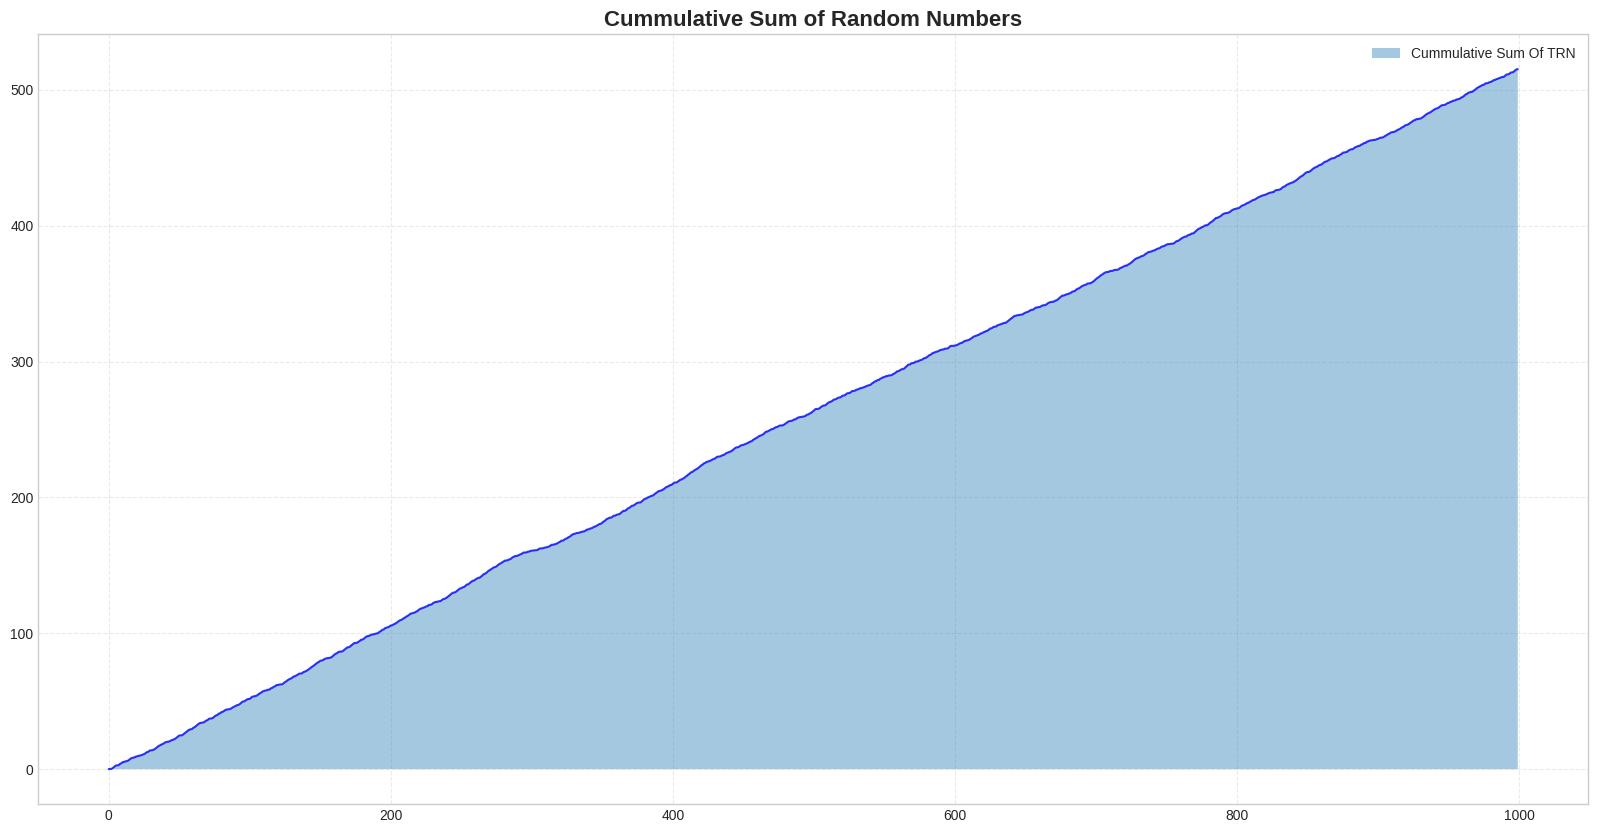

In [85]:
cummulative_sum = [np.sum(num_rand[:x]) for x in range(len(num_rand))]

dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.plot(cummulative_sum, color="blue", alpha=0.8)
plt.fill_between(range(len(num_rand)), cummulative_sum, label="Cummulative Sum Of TRN", alpha=0.4)
plt.title("Cummulative Sum of Random Numbers", weight="bold", fontsize=16)
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

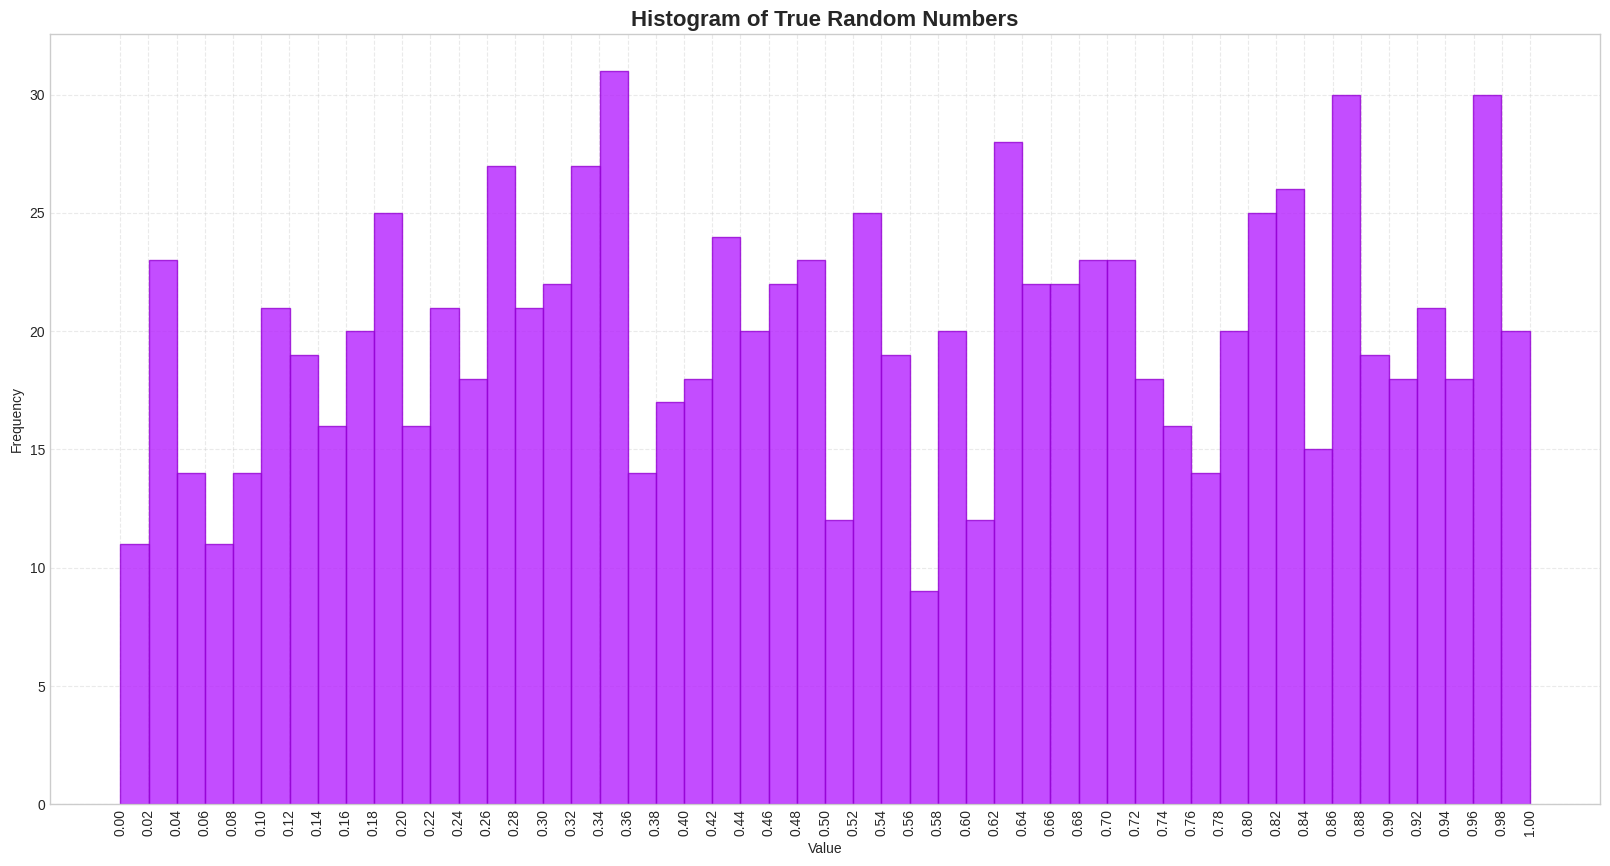

In [86]:
dpi = 100
plt.figure(figsize=(20, 10), dpi=dpi)
plt.hist(num_rand, bins=50, alpha=0.8, color="#b521ff", edgecolor='darkviolet')
plt.title("Histogram of True Random Numbers", weight="bold", fontsize=16)
plt.xticks(np.arange(0, 1.02, 0.02), rotation=90)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [87]:
from scipy.stats import kstest, chisquare
from statsmodels.sandbox.stats.runs import runstest_1samp
import pandas as pd
from scipy.stats import entropy

data = num_rand

# Uniformity Test
ks_stat, ks_p = kstest(data, 'uniform')
print(f"KS Test: p={ks_p}")

# Chi-square on histogram
counts, _ = np.histogram(data, bins=10)
chi_stat, chi_p = chisquare(counts)
print(f"Chi-Square: p={chi_p:.4f}")

# Runs Test
binary = data > np.median(data)
z_stat, z_p = runstest_1samp(binary)
print(f"Runs Test: p={z_p:.4f}")

# Autocorrelation
autocorr = pd.Series(data).autocorr(lag=1)
print(f"Lag-1 Autocorrelation: {autocorr:.4f}")

# Entropy
quantized = (data * 255).astype(np.uint8)
prob_dist, _ = np.histogram(quantized, bins=256)
prob_dist = prob_dist / prob_dist.sum()
ent = entropy(prob_dist, base=2)
print(f"Shannon Entropy: {ent:.4f} bits")


KS Test: p=0.1856017159143427
Chi-Square: p=0.0810
Runs Test: p=0.1456
Lag-1 Autocorrelation: 0.0360
Shannon Entropy: 7.7312 bits


| Test                                              | Result       | Interpretation                                                                           |
| ------------------------------------------------- | ------------ | ---------------------------------------------------------------------------------------- |
| **KS Test**<br>(Uniformity)                       | `p = 0.1856` | ✔️ Not significantly different from uniform. No evidence against randomness.             |
| **Chi-Square**<br>(Histogram uniformity)          | `p = 0.0810` | ✔️ Still above 0.05 → Pass. Distribution of values is reasonably uniform.                |
| **Runs Test**<br>(Independence/patterns)          | `p = 0.1456` | ✔️ Good. No unusual sequence of highs/lows.                                              |
| **Lag-1 Autocorrelation**                         | `0.0360`     | ✔️ Very low (ideal). Indicates very little linear dependence between successive numbers. |
| **Shannon Entropy**<br>(0–8 bits for 8-bit scale) | `7.7312`     | ✅ Excellent! Very close to 8 (max), indicating high unpredictability.                    |
